In [1]:
import easyocr

# Create an OCR reader object
reader = easyocr.Reader(['fr'])

# Read text from an image
result = reader.readtext('data/cni_0.jpg')

# Print the extracted text
for detection in result:
    print(detection[1])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteRÉPUBLIQUE
FRANÇAISE
FR
CARTE NATIONALE D'IDENTITÉ / IDENTITY CARD
NOM /Sumame
MARTIN
SPÉCIMEN
Prénoms / Given names
<
Maëlis-Gaëlle , Marie
SEXE ISex
NATIONALITÉ / Nationality
DATE DE NAISS
Date ofbirtn
F
FRA
13 07 1990
LIEU DE NAISSANCE
Place of birth
PARIS
NOM D'USAGE / Altemate name
usage NOM D'USAGE
N? DU DOCUMENT / Document N
DATE DEXPIR /Expirv date
D2H6862M2
11 02 2030
Jignture
546497
862


In [30]:
import pandas as pd

# Combiner tout le texte extrait en une seule chaîne
all_text = " ".join([detection[1] for detection in result]).strip().casefold()

# Créer un DataFrame avec une seule colonne "text"
df = pd.DataFrame([[all_text]], columns=["text"])

In [31]:
all_text

"république française fr carte nationale d'identité / identity card nom /sumame martin spécimen prénoms / given names < maëlis-gaëlle , marie sexe isex nationalité / nationality date de naiss date ofbirtn f fra 13 07 1990 lieu de naissance place of birth paris nom d'usage / altemate name usage nom d'usage n? du document / document n date dexpir /expirv date d2h6862m2 11 02 2030 jignture 546497 862"

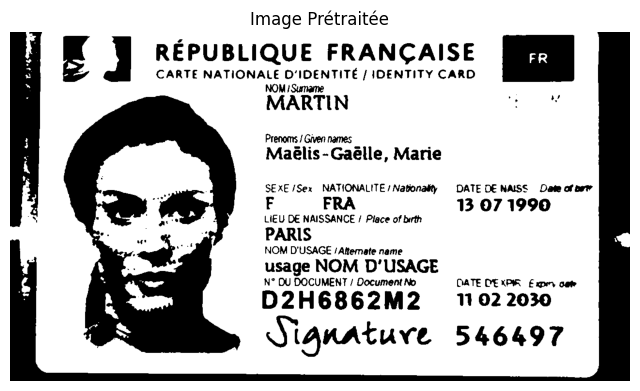

In [38]:
import cv2
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Lire l'image en niveaux de gris
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Appliquer un filtre pour réduire les bruits
    image = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Binariser l'image (convertir en noir et blanc)
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    # Afficher l'image prétraitée
    plt.figure(figsize=(8, 8))
    plt.title("Image Prétraitée")
    plt.imshow(binary_image, cmap="gray")
    plt.axis("off")
    plt.show()
    
    return binary_image

preprocessed_image = preprocess_image('data/cni_0.jpg')


In [35]:

test = reader.readtext(preprocessed_image)

In [36]:
all_text = " ".join([detection[1] for detection in test]).strip().casefold()

# Créer un DataFrame avec une seule colonne "text"
dff = pd.DataFrame([[all_text]], columns=["text"])
dff

,text
0,e] république française fr carte nationale d'i...


In [ ]:
df

"e] république française fr carte nationale d'identité identity card nom /sumamne martin prènoms / given names maëlis-gaêlle, marie sexe /sex nationalité nationatly date de najss daœ 0bnt f fra 13 07 1990 lieu de naissance / place of birth paris nom d'usage / atfemate name usage nom d'usage n' du document document n date dexpir exnv @at d2h6862m2 11 02 2030 jignture 546497"

In [ ]:
import os
import cv2
import easyocr
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt


# Extraction de texte
def extract_text(preprocessed_image):
    reader = easyocr.Reader(['fr'])
    result = reader.readtext(preprocessed_image)
    text = " ".join([detection[1] for detection in result])
    return text

# Fonction pour déterminer le type de document
def detect_document_type(text, reference_texts):
    # Convertir les textes en vecteurs TF-IDF
    vectorizer = TfidfVectorizer()
    all_texts = reference_texts + [text]  # Ajouter le texte extrait aux textes de référence
    tfidf_matrix = vectorizer.fit_transform(all_texts)
    
    # Calculer la similarité cosinus entre le texte extrait et les références
    similarities = cosine_similarity(tfidf_matrix[-1:], tfidf_matrix[:-1]).flatten()
    doc_types = ["carte nationale d'identite", "permis de conduire", "facture", "carte vitale"]
    
    # Trouver le type avec la plus grande similarité
    max_index = similarities.argmax()
    return doc_types[max_index]

# Charger les images et traiter le dossier
def process_images_in_folder(folder_path):
    reference_texts = [
        "carte nationale d'identité",  # Exemple CNI
        "permis de conduire conducteur",  # Exemple Permis
        "facture montant fournisseur produit total",  # Exemple Facture
        "carte vitale"
    ]
    
    data = []  # Pour stocker les résultats
    for filename in os.listdir(folder_path):
        if filename.endswith((".jpg", ".png", ".jpeg", ".pdf")):  # Vérifier les formats d'image
            image_path = os.path.join(folder_path, filename)
            
            # Extraire le texte
            text = extract_text(image_path)
            
            # Détecter le type de document
            document_type = detect_document_type(text, reference_texts)
            
            # Ajouter les résultats au DataFrame
            data.append({"image": filename, "text": text, "type": document_type})
    
    # Créer le DataFrame
    df = pd.DataFrame(data)
    return df

# Exemple d'utilisation
folder_path = "data"  # Dossier contenant les images
result_df = process_images_in_folder(folder_path)

# Afficher les résultats
print(result_df)

# (Optionnel) Sauvegarder dans un fichier CSV
result_df.to_csv("document_results.csv", index=False, encoding="utf-8")


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


                image                                               text  \
0  carte_vitale_0.jpg  Vitale mnae enuse 01/01/2007 Nathali DURAND 69...   
1       facture_0.png  FACTURE Référence F2023-00003 Version 1.0 INTI...   
2        permis_0.jpg  PeRmis DE ConDuiRe Kevjaloue Vaaheani 14 07.19...   
3           cni_0.jpg  RÉPUBLIQUE FRANÇAISE FR CARTE NATIONALE D'IDEN...   

                         type  
0                carte vitale  
1  carte nationale d'identite  
2          permis de conduire  
3  carte nationale d'identite  
